# Import libs

In [1]:
import pandas as pd
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import ipython_blocking
from pivottablejs import pivot_ui
import scikitplot as skplt
import sys

sys.path.append('..')
from eflow import DataFrameTypes
from eflow.analysis import DataAnalysis
from eflow.pipeline_segments import DataCleaner
from eflow.analysis import MissingDataAnalysis
from eflow.utils.pandas_utils import data_types_table

In [2]:
%matplotlib notebook
%matplotlib inline

In [3]:
def revdict(d):
    r = {}
    for k in d:
        for v in d[k]:
            if v not in r:
                r[v] = [k]
            else:
                r[v].append(k)
    return r
d={1:[1,2,3,4],2:[2,3,4],5:[1,3,6,7]}
a = revdict(d)
print(a)

{1: [1, 5], 2: [1, 2], 3: [1, 2, 5], 4: [1, 2], 6: [5], 7: [5]}


### Be sure to run the following

## Declare Worflow Variables

#### (This should be the only place you should have to declare anything)

In [4]:
dataset_path = "Datasets/titanic_train.csv"
target_column = "Survived"
parent_project_name = "Pre processing"
prediction_method = "Classification"
notebook_mode = True

# Import dataset

In [5]:
df = pd.read_csv(dataset_path)
display(df.shape)

(891, 12)

In [6]:
data_types_table(df)

,Data Types
Features,
Age,float64
Fare,float64
PassengerId,int64
Survived,int64
Pclass,int64
SibSp,int64
Parch,int64
Name,object
Sex,object


## Interaction tool for dataframes

### Explore the data

In [7]:
pivot_ui(df,
         outfile_path='Piviot_Table_JS.html')

Generating graph for null dendrogram graph...


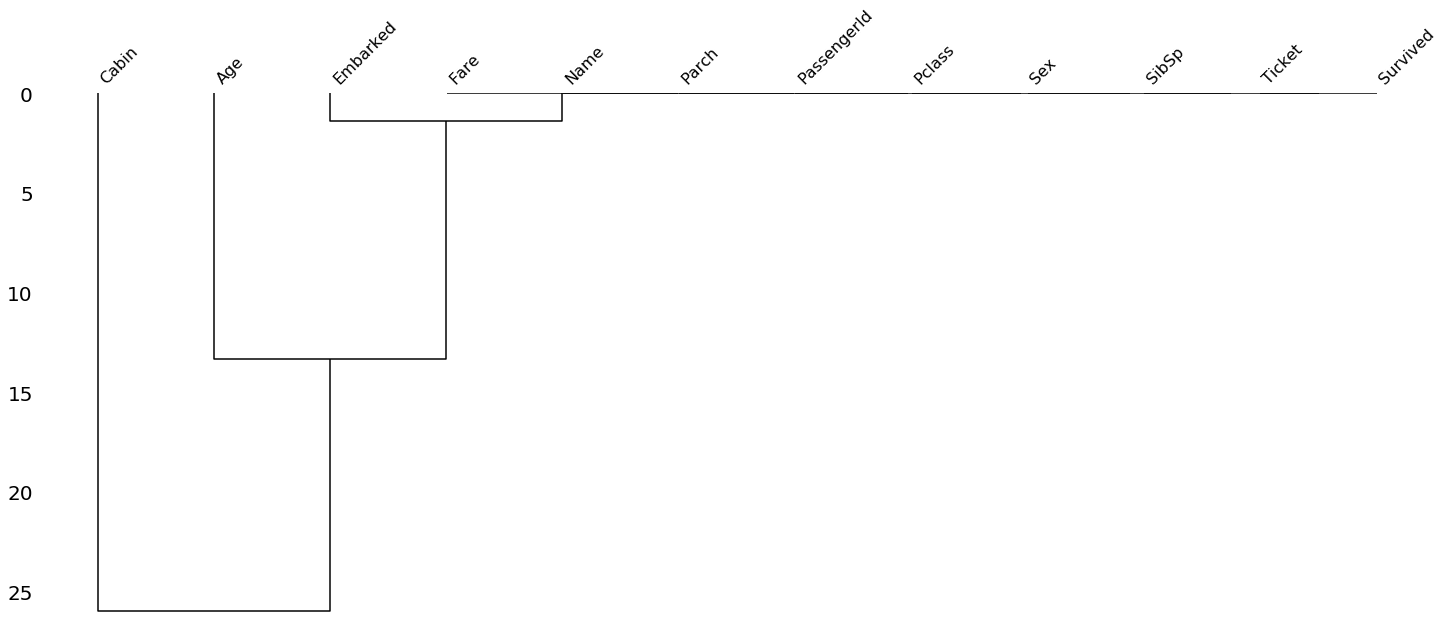

ValueError: 

In [9]:
import copy
missing_data_analysis = MissingDataAnalysis(sub_dir=parent_project_name)
# missing_data_analysis.perform_analysis(df.head(42),
#                                        "All Data")
tester = copy.deepcopy(df)
missing_data_analysis.plot_null_dendrogram_graph(tester,
                                                 "All Data")
raise ValueError

In [ ]:
# w = widgets.SelectMultiple(
#     options=['Apples', 'Oranges', 'Pears'],
#     value=['Oranges'],
#     #rows=10,
#     description='Fruits',
#     disabled=False
# )
# del w

In [ ]:
a = str(u"\u2192")
print(a)

## Remove Un-Wanted Columns

### Do not remove nans yet, let the datacleaner do it's job

In [ ]:
df.drop(columns=["Name",
                 "Ticket",
                 "PassengerId"],
        inplace=True)
df.head()

In [ ]:
from dateutil import parser
dt = parser.parse("Aug 28 1999 12:00AM")

In [ ]:
df["Date_test"] = ["2019-01-02" for _ in range(0,df.shape[0])]
df["Date_test"][0] = np.nan
# df["Date_test"] = [parser.parse(val)for val in df["Date_test"].value_counts().keys()]

## Basic Feature manipulation

### Change cabin column to have the level on the ship

In [ ]:
df["Cabin"] = df["Cabin"].str.replace(r'\d+', '').str[0]

## Change Feature Data types

### Look at data types

In [ ]:
df.dtypes

### Make given data type changes

In [ ]:
# df["Pclass"] = df["Pclass"].replace(1, np.nan)

### Final look at data types

In [ ]:
df.dtypes

## Set up DataFrameTypes

In [ ]:
df_features = DataFrameTypes(df,
                             target_column=target_column,
                             ignore_nulls=True)

## Skim through Value Counts

In [ ]:
for col in df.columns:
    if col not in df_features.get_float_features() and len(np.unique(df[col].dropna().values)) <= 12:
        display(df[col].value_counts())
        print("***" * 4 + "\n\n")

### Perform quick analysis

In [ ]:
analysis_obj = DataAnalysis(df,
                            df_features,
                            project_name=f'{parent_project_name}/General Analysis (Before Cleaning)',
                            missing_data_visuals=False)

## Data Cleaning

In [ ]:
data_cleaner = DataCleaner(df,
                           project_name=f'{parent_project_name}/Data Cleaning',
                           missing_data_visuals=True)

In [ ]:
data_cleaner.data_cleaning_widget(df,
                                  df_features)

In [ ]:
data_cleaner.get_last_saved_json_file_path()

In [ ]:
data_cleaner.data_cleaning_with_json_file(df,
                                          data_cleaner.get_last_saved_json_file_path())

In [ ]:
from impyute.imputation.cs import mice

a = df["Age"].tolist()
# start the MICE training
imputed_training=mice(df.values)

In [ ]:
import datawig

df_train, df_test = datawig.utils.random_split(df)

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Cabin','Embarked'], # column(s) containing information about the column we want to impute
    output_column= 'Age', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df, num_epochs=200)

In [ ]:
imputed_training=mice(df[df_features.get_numerical_features()].values)

In [ ]:
# !pip install datawig
# !pip install opencv-python
# !pip install Pillow
# !pip install tesserocr

In [ ]:
import random

df["Cabin"] = df["Cabin"].fillna("A")
test = df.drop(columns=["Date_test", "Embarked"]).dropna()

test["Cabin"] = df["Cabin"] == "B"
test["Sex"] = df["Sex"] == "male"
test[target_column] = [random.randint(0, 10) for _ in range(0,test.shape[0])]
print(len(test[target_column]))

y = test[target_column].values
X = test.values

print(X.shape)
print(y.shape)


df_features = DataFrameTypes(test,
                             target_column=target_column,
                             ignore_nulls=True) 
df_features.get_all_features()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=517, stratify=y,
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from eflow.modeling import optimize_model_grid
# Find best parameters for model
param_grid = {
    "max_depth": list(range(2, 3)),
    "min_samples_leaf": list(range(80, 130, 5)),
    "criterion": ["gini", "entropy"],
#     "n_splits": [20, 30]
}

model, best_params = optimize_model_grid(
    model=DecisionTreeClassifier(),
    X_train=X_train, y_train=y_train,
    param_grid=param_grid
)

In [ ]:
from eflow._hidden.Objects.enum import enum
from eflow.utils.sys_utils import create_plt_png, convert_to_filename, \
    df_to_image, write_object_text_to_file, get_unique_directory_path, \
    pickle_object_to_file
from eflow._hidden.Objects.FileOutput import *
from eflow._hidden.CustomExc import *
from eflow.analysis import DataAnalysis

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import scikitplot as skplt
import numpy as np
import warnings
import copy
import pickle
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

class ClassificationAnalysis(FileOutput):

    def __init__(self,
                 model,
                 model_name,
                 pred_funcs_dict,
                 sample_data,
                 project_name="Classification analysis_objects",
                 overwrite_full_path=None,
                 notebook_mode=True,
                 target_classes=None,
                 df_features=None,
                 columns=[],
                 save_model=True):
        """
        model:
            A fitted supervised machine learning model.

        model_name:
            The name of the model in string form.

        pred_funcs_dict:
            A dict of the name of the function and the function defintion for the
            model prediction methods.
            (Can handle either a return of probabilities or a singile value.)
            Init Example:
            pred_funcs = dict()
            pred_funcs["Predictions"] = model.predict
            pred_funcs["Probabilities"] = model.probas
         
        sample_data:
            Given data to then pass into our prediction functions to get a
            resultant to get the classification prediction 'type'. 

        project_name:
            Creates a parent or "project" folder in which all sub-directories
            will be inner nested.

        overwrite_full_path:
            Overwrites the path to the parent folder.

        notebook_mode:
            If in a python notebook display in the notebook.

        target_classes:
            Specfied list/np.array of targeted classes the model predicts. If set to
            none then it will attempt to pull from the sklearn's default attribute
            '.classes_'.

        df_features:
            DataFrameTypeHolder object. If initalized we can run correct/error
            analysis on the dataframe. Will save object in a pickle file and provided columns
            if initalized and df_features is not initalized.

        columns:
            Will overwrite over df_features (DataFrameTypeHolder) regardless 
            of whether or not df_features is init.
            
        Returns/Desc:
            Evaluates the given model based on the prediction functions pased to it.
            Saves the model and other various graphs/dataframes for evaluation.
        """

        # Init any parent objects
        FileOutput.__init__(self,
                            f'{project_name}/{model_name}',
                            overwrite_full_path)

        # Init objects without pass by refrence
        self.__model = copy.deepcopy(model)
        self.__model_name = copy.deepcopy(model_name)
        self.__notebook_mode = copy.deepcopy(notebook_mode)
        self.__target_values = copy.deepcopy(target_classes)
        self.__df_features = copy.deepcopy(df_features)
        self.__pred_funcs_dict = copy.deepcopy(pred_funcs_dict)
        self.__pred_funcs_types = dict()

        # Init on sklearns default target classes attribute
        if not self.__target_values:
            self.__target_values = copy.deepcopy(model.classes_)
        # ---
        if len(self.__target_values) != 2:
            self.__binary_classifcation = False
        else:
            self.__binary_classifcation = True

        # Save machine learning model
        if save_model:
            pickle_object_to_file(self.__model,
                                  self.get_output_folder(),
                                  f'{self.__model_name}')

        # ---
        check_create_dir_structure(self.get_output_folder(),
                                   "Extras")
        # Save predicted classes
        write_object_text_to_file(self.__target_values,
                                  self.get_output_folder() + "Extras",
                                  "_Classes")

        # Save features and or df_features object
        if columns or df_features:
            if columns:
                write_object_text_to_file(columns,
                                          self.get_output_folder() + "Extras",
                                          "_Features")
            else:
                write_object_text_to_file(df_features.get_all_features(),
                                          self.get_output_folder() + "Extras",
                                          "_Features")
                pickle_object_to_file(self.__model,
                                      self.get_output_folder() + "Extras",
                                      "_df_features")

        # Find the 'type' of each prediction. Probabilities or Predictions
        if self.__pred_funcs_dict:
            for pred_name, pred_func in self.__pred_funcs_dict.items():
                model_output = pred_func(
                    np.reshape(sample_data[0],
                               (-1, sample_data.shape[1])))[0]

                # Confidence / Probability (Continuous output)
                if isinstance(model_output, list) or isinstance(model_output,
                                                                np.ndarray):
                    self.__pred_funcs_types[pred_name] = "Probabilities"

                    # Classification (Discrete output)
                else:
                    self.__pred_funcs_types[pred_name] = "Predictions"
        else:
            raise RequiresPredictionMethods

    def __get_model_prediction(self,
                               pred_name,
                               X,
                               thresholds=None):
        """
        X:
            Feature matrix.

        pred_name:
            The name of the prediction function in questioned stored in 'self.__pred_funcs_dict'

        thresholds:
            If the model outputs a probability list/numpy array then we apply
            thresholds to the ouput of the model.
            For classification only; will not affect the direct output of
            the probabilities.

        Returns/Desc:
            Returns back a predicted value based for a given matrix.
            Handles prediction function 'types' Predictions and Probabilities.
            Helps streamline the entire process of evaluating classes.
        """
        # DEBUG_MARKER

        # Must be a prediction function
        if self.__pred_funcs_types[pred_name] == "Predictions":
            return self.__pred_funcs_dict[pred_name](X)

        elif self.__pred_funcs_types[pred_name] == "Probabilities":
            
            # Validate probabilities
            if thresholds:
                if isinstance(thresholds, list) or \
                        isinstance(thresholds, np.ndarray):
                    if len(thresholds) != len(self.__target_values):
                        raise ThresholdLength
                else:
                    raise ThresholdType

            model_output = self.__get_model_probas(pred_name,
                                                   X)
            if not thresholds:
                return np.asarray([self.__target_values[np.argmax(proba)]
                                   for proba in model_output])
                
            
            bool_matrix_thresholds = model_output < thresholds
            
            prob_passed_matrix = np.asarray([
                np.asarray([model_output[i][0] if passed else float("-inf") 
                            for i,passed in enumerate(bool_vector)])
                for bool_vector in bool_matrix_thresholds])            

            model_predictions = np.asarray([self.__target_values[np.argmax(proba_vector)]
                                            if sum(proba_vector != float("-inf")) > 0 
                                            else self.__target_values[np.argmax(model_output)]
                                            for proba_vector in prob_passed_matrix])
            return model_predictions
        else:
            raise UnknownModelOutputType

    def __get_model_probas(self,
                           pred_name,
                           X):
        """
        X:
            Feature matrix.

        pred_name:
            The name of the prediction function in questioned stored in 'self.__pred_funcs_dict'

        Returns/Desc:
            Returns back a series of values between 0-1 to represent it's confidence.
            Invokes an error if the prediction function call is anything but a Probabilities
            call.
        """

        if self.__pred_funcs_types[pred_name] == "Probabilities":
            model_output = self.__pred_funcs_dict[pred_name](X)

            # ---
            if isinstance(model_output, list):
                model_output = np.asarray(model_output)

            return model_output
        else:
            raise ProbasNotPossible

    def __create_sub_dir_with_thresholds(self,
                                         pred_name,
                                         dataset_name,
                                         thresholds):
        """
        pred_name:
            The name of the prediction function in questioned stored in 'self.__pred_funcs_dict'

        dataset_name:
            The passed in dataset's name.

        thresholds:
            If the model outputs a probability list/numpy array then we apply
            thresholds to the ouput of the model.
            For classification only; will not affect the direct output of
            the probabilities.

        Returns/Desc:
            Looking at the root of the starting directory and looking at each
            '_Thresholds.txt' file to determine if the files can be outputed
            to that directory. The content of the file must match the content
            of the list/numpy array 'thresholds'.
        """
        sub_dir = f'{dataset_name}/{pred_name}'

        # Only generate extra folder structure if function type is Probabilities
        if self.__pred_funcs_types[pred_name] == "Probabilities":

            # ------
            if not thresholds:
                sub_dir = f'{sub_dir}/No Thresholds'
            else:
                i = 0
                sub_dir = f'{sub_dir}/Thresholds'
                tmp_sub_dir = copy.deepcopy(sub_dir)
                while True:
                    threshold_dir = self.get_output_folder()
                    if i > 0:
                        tmp_sub_dir = (sub_dir + f' {i}')
                    threshold_dir += tmp_sub_dir

                    # If file exists with the same thresholds; than use this directory
                    if os.path.exists(threshold_dir):
                        if self.__compare_thresholds_to_saved_thresholds(
                                threshold_dir,
                                thresholds):
                            sub_dir = tmp_sub_dir
                            break

                    # Create new directory
                    else:
                        os.makedirs(threshold_dir)
                        write_object_text_to_file(thresholds,
                                                  threshold_dir,
                                                  "_Thresholds")
                        sub_dir = tmp_sub_dir
                        break

                    # Iterate for directory name change
                    i += 1

        return sub_dir

    def __compare_thresholds_to_saved_thresholds(self,
                                                 directory_pth,
                                                 thresholds):
        """
        directory_pth:
            Path to the given folder where the "_Thresholds.txt"

        thresholds:
            If the model outputs a probability list/numpy array then we apply
            thresholds to the ouput of the model.
            For classification only; will not affect the direct output of
            the probabilities.

        Returns/Desc:
            Compare the thresholds object to the text file; returns true if
            the file exists and the object's value matches up.
        """

        file_directory = correct_directory_path(directory_pth)

        if os.path.exists(file_directory):

            # Extract file contents and convert to a list object
            file = open(file_directory + "_Thresholds.txt", "r")
            line = file.read()
            converted_list = line.split("=")[-1].strip().strip('][').split(
                ', ')
            converted_list = [float(val) for val in converted_list]
            file.close()

            if thresholds == converted_list:
                return True
            else:
                return False
        else:
            return False

    def peform_analysis(self,
                        X,
                        y,
                        dataset_name,
                        thresholds_matrix=None,
                        figsize=(10, 8),
                        normalize_confusion_matrix=True,
                        ignore_metrics=[],
                        custom_metrics=dict(),
                        average_scoring=["micro",
                                         "macro",
                                         "weighted"],
                        display_analysis_graphs=False):
        """
        X/y:
            Feature matrix/Target data vector.

        dataset_name:
            The dataset's name.

        thresholds_matrix:
            List of list/Matrix of thresholds

            each thresholds:
                If the model outputs a probability list/numpy array then we apply
                thresholds to the ouput of the model.
                For classification only; will not affect the direct output of
                the probabilities.

        figsize:
            Plot's dimension's.

        normalize_confusion_matrix:
            Normalize the confusion matrix buckets.

        ignore_metrics:
            Specify set metrics to ignore. (F1-Score, Accuracy etc).

        ignore_metrics:
            Specify the default metrics to not apply to the classification
            analysis.
                * Precision
                * MCC
                * Recall
                * F1-Score
                * Accuracy

        custom_metrics:
            Pass the name of metric(s) and the function definition(s) in a
            dictionary.

        average_scoring:
            Determines the type of averaging performed on the data.

        display_analysis_graphs:
            Controls visual display of error error analysis if it is able to run.

        Returns/Desc:
            Performs all classification functionality with the provided feature
            data and target data.
                * plot_precision_recall_curve
                * classification_evaluation
                * plot_confusion_matrix
        """
        if isinstance(thresholds_matrix, np.ndarray):
            thresholds_matrix = thresholds_matrix.tolist()

        if not thresholds_matrix:
            thresholds_matrix = list()

        if isinstance(thresholds_matrix, list) and not isinstance(
                thresholds_matrix[0], list):
            thresholds_matrix = list(thresholds_matrix)
        
        
        if None not in thresholds_matrix:
            thresholds_matrix.append(None)

        print("\n\n" + "---" * 10 + f'{dataset_name}' + "---" * 10)

        for pred_name, pred_type in self.__pred_funcs_types.items():
            print(f"Now running classification on {pred_name}", end = '')
            print("hit")
            for thresholds in thresholds_matrix:
                if pred_type == "Predictions":
                    thresholds = None
                else:
                    if thresholds:
                        print(f"on thresholds:\n{thresholds}")
                    else:
                        print("No thresholds")
                
                self.classification_metrics(X,
                                            y,
                                            pred_name=pred_name,
                                            dataset_name=dataset_name,
                                            thresholds=thresholds,
                                            ignore_metrics=ignore_metrics,
                                            custom_metrics=custom_metrics,
                                            average_scoring=average_scoring)

                self.plot_confusion_matrix(X,
                                           y,
                                           pred_name=pred_name,
                                           dataset_name=dataset_name,
                                           thresholds=thresholds,
                                           figsize=figsize,
                                           normalize=normalize_confusion_matrix)

                if pred_type == "Probabilities":
                    self.plot_precision_recall_curve(X,
                                                     y,
                                                     pred_name=pred_name,
                                                     dataset_name=dataset_name,
                                                     figsize=figsize,
                                                     thresholds=thresholds)
                    self.plot_roc_curve(X,
                                        y,
                                        pred_name=pred_name,
                                        dataset_name=dataset_name,
                                        figsize=figsize,
                                        thresholds=thresholds)

                    if self.__binary_classifcation:
                        self.plot_lift_curve(X,
                                             y,
                                             pred_name=pred_name,
                                             dataset_name=dataset_name,
                                             figsize=figsize,
                                             thresholds=thresholds)
                        self.plot_ks_statistic(X,
                                               y,
                                               pred_name=pred_name,
                                               dataset_name=dataset_name,
                                               figsize=figsize,
                                               thresholds=thresholds)
                        self.plot_calibration_curve(X,
                                                    y,
                                                    pred_name=pred_name,
                                                    dataset_name=dataset_name,
                                                    figsize=figsize,
                                                    thresholds=thresholds)
                        self.plot_cumulative_gain(X,
                                                  y,
                                                  pred_name=pred_name,
                                                  dataset_name=dataset_name,
                                                  figsize=figsize,
                                                  thresholds=thresholds)
                        
                if self.__df_features:
                    self.classification_error_analysis(X,
                                                       y,
                                                       pred_name=pred_name,
                                                       dataset_name=dataset_name,
                                                       thresholds=thresholds,
                                                       display_analysis_graphs=display_analysis_graphs)

                    if pred_type == "Predictions":
                        break

    def plot_calibration_curve(self,
                               X,
                               y,
                               pred_name,
                               dataset_name,
                               thresholds=None,
                               save_file=True,
                               title=None,
                               ax=None,
                               cmap='nipy_spectral',
                               figsize=None,
                               title_fontsize='large',
                               text_fontsize='medium'):

        """
        X/y:
            Feature matrix/Target data vector.

        pred_name:
            The name of the prediction function in questioned
            stored in 'self.__pred_funcs_dict'

        dataset_name:
            The dataset's name.

        thresholds:
            If the model outputs a probability list/numpy array then we apply
            thresholds to the ouput of the model.
            For classification only; will not affect the direct output of
            the probabilities.
        
        save_file:
            Boolean value to wether or not to save the file. 

        From scikit-plot documentation (Note not all attributes are provided to you):
        Link: http://tinyurl.com/y3ym5pyc
        Returns/Descr:
            Plots calibration curves for a set of classifier probability estimates.
        """
        
        filename = f'KS Statistic on {dataset_name}'
        sub_dir = self.__create_sub_dir_with_thresholds(pred_name,
                                                        dataset_name,
                                                        thresholds)
        if not title:
            title = filename

        skplt.metrics.plot_calibration_curve(y,
                                             self.__get_model_probas(pred_name,
                                                                     X),
                                             title=title,
                                             ax=ax,
                                             cmap=cmap,
                                             figsize=figsize,
                                             title_fontsize=title_fontsize,
                                             text_fontsize=text_fontsize)

        if save_file:
            create_plt_png(self.get_output_folder(),
                           sub_dir,
                           convert_to_filename(filename))

        if self.__notebook_mode:
            plt.show()
        plt.close()

    def plot_roc_curve(self,
                       X,
                       y,
                       pred_name,
                       dataset_name,
                       thresholds=None,
                       save_file=True,
                       title=None,
                       ax=None,
                       figsize=(10, 8),
                       title_fontsize='large',
                       text_fontsize='medium'):

        """
        X/y:
            Feature matrix/Target data vector.

        pred_name:
            The name of the prediction function in questioned
            stored in 'self.__pred_funcs_dict'

        dataset_name:
            The dataset's name.

        thresholds:
            If the model outputs a probability list/numpy array then we apply
            thresholds to the ouput of the model.
            For classification only; will not affect the direct output of
            the probabilities.
        
        save_file:
            Boolean value to wether or not to save the file. 

        From scikit-plot documentation (Note not all attributes are provided to you):
        Link: http://tinyurl.com/y3ym5pyc
        Returns/Descr:
            Creates ROC curves from labels and predicted probabilities.
        """
        filename = f'Roc Curve on {dataset_name}'
        sub_dir = self.__create_sub_dir_with_thresholds(pred_name,
                                                        dataset_name,
                                                        thresholds)
        if not title:
            title = filename

        skplt.metrics.plot_roc(y,
                               self.__get_model_probas(pred_name,
                                                       X),
                               title=title,
                               ax=ax,
                               figsize=figsize,
                               title_fontsize=title_fontsize,
                               text_fontsize=text_fontsize)

        if save_file:
            create_plt_png(self.get_output_folder(),
                           sub_dir,
                           convert_to_filename(filename))

        if self.__notebook_mode:
            plt.show()
        plt.close()

    def plot_cumulative_gain(self,
                             X,
                             y,
                             pred_name,
                             dataset_name,
                             thresholds=None,
                             save_file=True,
                             title=None,
                             ax=None,
                             figsize=(10, 8),
                             title_fontsize='large',
                             text_fontsize='medium'):

        """
        X/y:
            Feature matrix/Target data vector.

        pred_name:
            The name of the prediction function in questioned
            stored in 'self.__pred_funcs_dict'.

        dataset_name:
            The dataset's name.

        thresholds:
            If the model outputs a probability list/numpy array then we apply
            thresholds to the ouput of the model.
            For classification only; will not affect the direct output of
            the probabilities.

        save_file:
            Boolean value to wether or not to save the file. 

        From scikit-plot documentation (Note not all attributes are provided to you):
        Link: http://tinyurl.com/y3ym5pyc
        Returns/Descr:
        """
        filename = f'Cumulative Gain gain on {dataset_name}'
        sub_dir = self.__create_sub_dir_with_thresholds(pred_name,
                                                        dataset_name,
                                                        thresholds)
        if not title:
            title = filename

        skplt.metrics.plot_cumulative_gain(y,
                                           self.__get_model_probas(pred_name,
                                                                   X),
                                           title=title,
                                           ax=ax,
                                           figsize=figsize,
                                           title_fontsize=title_fontsize,
                                           text_fontsize=text_fontsize)

        if save_file:
            create_plt_png(self.get_output_folder(),
                           sub_dir,
                           convert_to_filename(filename))

        if self.__notebook_mode:
            plt.show()
        plt.close()

    def plot_precision_recall_curve(self,
                                    X,
                                    y,
                                    pred_name,
                                    dataset_name,
                                    thresholds=None,
                                    save_file=True,
                                    title=None,
                                    plot_micro=True,
                                    classes_to_plot=None,
                                    ax=None,
                                    figsize=(10, 8),
                                    cmap='nipy_spectral',
                                    title_fontsize='large',
                                    text_fontsize='medium'):
        """
        X/y:
            Feature matrix/Target data vector.

        pred_name:
            The name of the prediction function in questioned
            stored in 'self.__pred_funcs_dict'

        dataset_name:
            The dataset's name.

        thresholds:
            If the model outputs a probability list/numpy array then we apply
            thresholds to the ouput of the model.
            For classification only; will not affect the direct output of
            the probabilities.

        From scikit-plot documentation (Note not all attributes are provided to you):
        Link: http://tinyurl.com/y3ym5pyc
        Returns/Descr:
            Creates a plot precision recall curve plot based on the models predictions.
        """

        filename = f'Precision Recall on {dataset_name}'
        sub_dir = self.__create_sub_dir_with_thresholds(pred_name,
                                                        dataset_name,
                                                        thresholds)
        if not title:
            title = filename

        skplt.metrics.plot_precision_recall(y,
                                            self.__get_model_probas(pred_name,
                                                                    X),
                                            title=title,
                                            plot_micro=plot_micro,
                                            classes_to_plot=classes_to_plot,
                                            ax=ax,
                                            figsize=figsize,
                                            cmap=cmap,
                                            title_fontsize=title_fontsize,
                                            text_fontsize=text_fontsize)

        if save_file:
            create_plt_png(self.get_output_folder(),
                           sub_dir,
                           convert_to_filename(filename))

        if self.__notebook_mode:
            plt.show()
        plt.close()

    def plot_lift_curve(self,
                        X,
                        y,
                        pred_name,
                        dataset_name,
                        thresholds=None,
                        save_file=True,
                        title=None,
                        ax=None,
                        figsize=(10, 8),
                        title_fontsize='large',
                        text_fontsize='medium'):
        """
        X/y:
            Feature matrix/Target data vector.

        pred_name:
            The name of the prediction function in questioned
            stored in 'self.__pred_funcs_dict'

        dataset_name:
            The dataset's name.

        thresholds:
            If the model outputs a probability list/numpy array then we apply
            thresholds to the ouput of the model.
            For classification only; will not affect the direct output of
            the probabilities.

        From scikit-plot documentation (Note not all attributes are provided to you):
        Link: http://tinyurl.com/y3ym5pyc
        Returns/Descr:
            Creates a plot precision recall curve plot based on the models predictions.
        """

        filename = f'Lift Curve on {dataset_name}'
        sub_dir = self.__create_sub_dir_with_thresholds(pred_name,
                                                        dataset_name,
                                                        thresholds)
        if not title:
            title = filename

        skplt.metrics.plot_lift_curve(y,
                                      self.__get_model_probas(pred_name,
                                                              X),
                                      thresholds=thresholds,
                                      title=title,
                                      ax=ax,
                                      figsize=figsize,
                                      title_fontsize=title_fontsize,
                                      text_fontsize=text_fontsize)
        if save_file:
            create_plt_png(self.get_output_folder(),
                           sub_dir,
                           convert_to_filename(filename))

        if self.__notebook_mode:
            plt.show()
        plt.close()

    def plot_confusion_matrix(self,
                              X,
                              y,
                              pred_name,
                              dataset_name,
                              thresholds=None,
                              save_file=True,
                              title=None,
                              normalize=False,
                              hide_zeros=False,
                              hide_counts=False,
                              x_tick_rotation=0,
                              ax=None,
                              figsize=(10, 8),
                              cmap='Blues',
                              title_fontsize='large',
                              text_fontsize='medium'):
        """
        X/y:
            Feature matrix/Target data vector.

        pred_name:
            The name of the prediction function in questioned
            stored in 'self.__pred_funcs_dict'

        dataset_name:
            The dataset's name.

        thresholds:
            If the model outputs a probability list/numpy array then we apply
            thresholds to the ouput of the model.
            For classification only; will not affect the direct output of
            the probabilities.

        From scikit-plot documentation (Note not all attributes are provided to you):
        Link: http://tinyurl.com/y3ym5pyc
        Returns/Descr:
            Creates a confusion matrix plot based on the models predictions.
        """
        filename = f'Confusion Matrix: {dataset_name}'
        sub_dir = self.__create_sub_dir_with_thresholds(pred_name,
                                                        dataset_name,
                                                        thresholds)
        if not title:
            title = filename

        warnings.filterwarnings('ignore')
        skplt.metrics.plot_confusion_matrix(
            self.__get_model_prediction(pred_name,
                                        X,
                                        thresholds),
            y,
            title=title,
            normalize=normalize,
            hide_zeros=hide_zeros,
            hide_counts=hide_counts,
            x_tick_rotation=x_tick_rotation,
            ax=ax,
            figsize=figsize,
            cmap=cmap,
            title_fontsize=title_fontsize,
            text_fontsize=text_fontsize)
        warnings.filterwarnings('default')

        if save_file:
            create_plt_png(self.get_output_folder(),
                           sub_dir,
                           convert_to_filename(filename))

        if self.__notebook_mode:
            plt.show()
        plt.close()

    def classification_metrics(self,
                               X,
                               y,
                               pred_name,
                               dataset_name,
                               thresholds=None,
                               save_file=True,
                               title="",
                               custom_metrics=dict(),
                               ignore_metrics=[],
                               average_scoring=["micro",
                                                "macro",
                                                "weighted"]):
        """
        X/y:
            Feature matrix/Target data vector.

        pred_name:
            The name of the prediction function in questioned stored
            in 'self.__pred_funcs_dict'

        dataset_name:
            The dataset's name.

        thresholds:
            If the model outputs a probability list/numpy array then we apply
            thresholds to the ouput of the model.
            For classification only; will not affect the direct output of
            the probabilities.

        save_file:
            Determines whether or not to save the generated document.

        title:
            Adds to the column 'Metric Score'.

        sub_dir:
            Specify a subdirectory to append to the output path of the file.

        custom_metrics:
            Pass the name of metric(s) and the function definition(s) in a
            dictionary.

        ignore_metrics:
            Specify the default metrics to not apply to the classification
            analysis.
                * Precision
                * MCC
                * Recall
                * F1-Score
                * Accuracy

        average_scoring:
            Determines the type of averaging performed on the data.
                * micro
                * macro
                * weighted

        Returns/Desc:
            Creates/displays a dataframe object based on the model's
            predictions on the feature matrix compared to target data.
        """
        filename = f'Metric Evaluation on {dataset_name}'
        sub_dir = self.__create_sub_dir_with_thresholds(pred_name,
                                                        dataset_name,
                                                        thresholds)

        if not isinstance(average_scoring, list):
            average_scoring = [average_scoring]

        # Default metric name's and their function
        metric_functions = dict()
        metric_functions["Precision"] = precision_score
        metric_functions["MCC"] = matthews_corrcoef
        metric_functions["Recall"] = recall_score
        metric_functions["F1-Score"] = f1_score
        metric_functions["Accuracy"] = accuracy_score

        warnings.filterwarnings('ignore')

        # Ignore default metrics if needed
        for remove_metric in ignore_metrics:
            if remove_metric in metric_functions:
                del metric_functions[remove_metric]

        # Add in custom metrics
        if len(custom_metrics.keys()):
            metric_functions.update(custom_metrics)

        # Evaluate model on metrics
        evaluation_report = dict()
        for metric_name in metric_functions:
            for average_score in average_scoring:

                model_predictions = self.__get_model_prediction(pred_name,
                                                                X,
                                                                thresholds)
                try:
                    evaluation_report[f'{metric_name}({average_score})'] = \
                        metric_functions[metric_name](y_true=y,
                                                      y_pred=model_predictions,
                                                      average=average_score)
                except TypeError:
                    evaluation_report[metric_name] = metric_functions[
                        metric_name](y,
                                     model_predictions)
                    break

                except ValueError:
                    pass

        warnings.filterwarnings('default')

        if title and len(title) > 0:
            index_name = f"Metric Scores ({title})"
        else:
            index_name = "Metric Scores"

        # ---
        evaluation_report = pd.DataFrame({index_name:
                                              [f'{metric_score:.4f}'
                                               for metric_score
                                               in evaluation_report.values()]},
                                         index=list(evaluation_report.keys()))

        if self.__notebook_mode:
            display(evaluation_report)
        else:
            print(evaluation_report)

        if save_file:
            # Create image file
            df_to_image(evaluation_report,
                        self.get_output_folder(),
                        sub_dir,
                        convert_to_filename(filename),
                        col_width=20,
                        show_index=True,
                        format_float_pos=4)

    def classification_error_analysis(self,
                                      X,
                                      y,
                                      pred_name,
                                      dataset_name,
                                      thresholds=None,
                                      save_file=True,
                                      display_analysis_graphs=False):
        """
        X/y:
            Feature matrix/Target data vector.

        pred_name:
            The name of the prediction function in questioned
            stored in 'self.__pred_funcs_dict'

        dataset_name:
            The dataset's name.

        thresholds:
            If the model outputs a probability list/numpy array then we apply
            thresholds to the ouput of the model.
            For classification only; will not affect the direct output of
            the probabilities.

        save_file:
            Determines whether or not to save the generated document.
            
        display_analysis_graphs:
            Controls visual display of graph generation.

        Returns/Descr:
            Creates a directory structure of subsetted data produced by all correctly/predicted.
        """

        sub_dir = self.__create_sub_dir_with_thresholds(pred_name,
                                                        dataset_name,
                                                        thresholds)

        model_predictions = self.__get_model_prediction(pred_name,
                                                        X,
                                                        thresholds=thresholds)

        if sum(model_predictions == y):
            if display_analysis_graphs:
                print("\n\n" + "*" * 10 +
                      "Correctly predicted analysis"
                      + "*" * 10 + "\n")
            else:
                print("\n\n" + "*" * 10 +
                      "Generating graphs for model's correctly predicted..." +
                      "*" * 10 + "\n")
                DataAnalysis(pd.DataFrame(X[model_predictions == y],
                                          columns=self.__df_features.get_all_features()),
                             self.__df_features,
                             overwrite_full_path=self.get_output_folder() +
                                                 sub_dir + "/Correctly Predicted Data/",
                             missing_data_visuals=False,
                             notebook_mode=display_analysis_graphs)
        else:
            print("Your model predicted nothing correctly...dam that sucks")

        if sum(model_predictions != y):
            if display_analysis_graphs:
                print("\n\n" + "*" * 10 +
                      "Incorrectly predicted analysis"
                      + "*" * 10 + "\n")
            else:
                print("\n\n" + "*" * 10 +
                      "Generating graphs for model's incorrectly predicted..." +
                      "*" * 10 + "\n")
            
#             for target_value in self.__target_values:
                

            DataAnalysis(pd.DataFrame(X[model_predictions != y],
                                      columns=self.__df_features.get_all_features()),
                         self.__df_features,
                         overwrite_full_path=self.get_output_folder() +
                                             sub_dir + "/Incorrectly Predicted Data/",
                         missing_data_visuals=False,
                         notebook_mode=display_analysis_graphs)
        else:
            print(
                "\n\nYour model predicted everything correctly...there is something very wrong here...")

    def classification_report(self,
                              X,
                              y,
                              pred_name,
                              dataset_name,
                              thresholds=None,
                              save_file=True):
        """
        X/y:
            Feature matrix/Target data vector.

        pred_name:
            The name of the prediction function in questioned
            stored in 'self.__pred_funcs_dict'

        dataset_name:
            The dataset's name.

        thresholds:
            If the model outputs a probability list/numpy array then we apply
            thresholds to the ouput of the model.
            For classification only; will not affect the direct output of
            the probabilities.

        save_file:
            Determines whether or not to save the generated document.

        Returns/Descr:
            Creates a report of all target's metric evaluations
            based on the model's prediction output.
        """
        filename = f'Classification Report {dataset_name}'
        sub_dir = self.__create_sub_dir_with_thresholds(pred_name,
                                                        dataset_name,
                                                        thresholds)

        # Create dataframe report
        report_df = pd.DataFrame(classification_report(y,
                                                       self.__get_model_prediction(
                                                           pred_name,
                                                           X,
                                                           thresholds),
                                                       output_dict=True))

        # ---
        if self.__notebook_mode:
            display(report_df)
        else:
            print(report_df)

        if save_file:
            # Output dataframe as png
            df_to_image(report_df,
                        self.get_output_folder(),
                        sub_dir,
                        filename,
                        col_width=20,
                        show_index=True,
                        format_float_pos=4)

In [ ]:
dt_analysis = ClassificationAnalysis(model=model,
                                     pred_funcs_dict={"Probabilities function":model.predict_proba,
                                                      "Predict function":model.predict},
                                     sample_data=X_train,
                                     model_name=repr(model).split("(")[0],
                                     project_name=f'{parent_project_name}/Classification Analysis',
                                     notebook_mode=True,
                                     df_features=df_features)

dt_analysis.perform_analysis(X=X_train,
                             y=y_train,
                             dataset_name="Training Data",
                             thresholds_matrix=[[.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2],
                                               ])

In [ ]:
X_train

In [ ]:
os.path.exists("/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlowMaster/Testing/eFlow Data/Pre processing/Supervised Analysis/DecisionTreeClassifier/Probabilities function/Thresholds")

In [ ]:
get_unique_directory_path(os.getcwd() + "/eFlow Data/Pre processing/Supervised Analysis/DecisionTreeClassifier/Test data/Probability Classification/",
                        "Model Results")

In [ ]:
error_string = os.getcwd().replace("/", "///")
error_string

In [ ]:
ab = "/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlowMaster/Testing/eFlow Data/Pre processing/Supervised Analysis/DecisionTreeClassifier/Test data/Probability Classification"
correct_directory_path(ab)

In [ ]:
a=[[1,2],[1,2,3],[1]]
c = copy.deepcopy(a)
b=np.array(a)
b.tolist()
hhh = None
if hhh:
    print("test")

In [ ]:
bbb = None

if not bbb:
    print("test")
else:
    print("fff")

In [ ]:
vector_y = copy.deepcopy(y_test)
vector_y = np.where(vector_y==0, "Test", vector_y) 
vector_y = np.where(vector_y=='1', "Blarg", vector_y)
vector_y = np.where(vector_y=='2', "Dragon", vector_y)
vector_y

In [ ]:
skplt.metrics.plot_confusion_matrix(vector_y, vector_y)

In [ ]:
thresholds = [0, 0, 8.3, 0, 0, 0, 0, 0, 0, 0, .36]

model_output = model.predict_proba(X_train)

print(model_output)
# Validate probabilities
if thresholds:
    if isinstance(thresholds, list) or \
            isinstance(thresholds, np.ndarray):
        if sum(thresholds) < .98:
            print("Thresholds didn't add up to 98%-100%! "
                  "This may cause issues in your results!")
    else:
        raise ThresholdType

# ---
if isinstance(model_output, list):
    model_output = np.asarray(model_output)

if isinstance(model_output, np.ndarray):
    if thresholds:
        outputs_passed_threshold = model_output > np.asarray(thresholds)
outputs_passed_threshold

In [ ]:
!pip install warning

In [ ]:
import warnings
class UnExpectedData(UserWarning, ValueError):
    pass

In [ ]:
model_output

In [ ]:
model_output = model.predict_proba(X_train)
bool_matrix_thresholds = model_output < np.asarray([.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2])

tmp_matrix = []
for bool_vector in bool_matrix_thresholds:
    tmp_vector = []
    for i,passed in enumerate(bool_vector):
        if passed:
            tmp_vector.append(model_output[i][0])
        else:
            tmp_vector.append(float("-inf"))
    tmp_matrix.append(tmp_vector)
print(tmp_matrix[1])

In [ ]:
import missingno as msno

In [ ]:
display(df.isnull().sum())



In [ ]:
ax = msno.bar(df[df.columns[df.isna().any()].tolist()],
              color="#072F5F")

In [ ]:
features = df.isnull().sum().index.tolist()
null_values = df.isnull().sum().values.tolist()
null_sorted_features, null_values = zip(*sorted(zip(null_values,
                                                    features)))

for feature_index, value in enumerate(null_values):
    if value == 0:
        break

In [ ]:
from eflow._hidden.utils.meta_data_identity import check_create_metadata_of_dataframe
testing_path = "/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlowMaster/Testing/eflow Data/Pre processing/Missing Data/All Data"
check_create_metadata_of_dataframe(df,
                                   testing_path)

In [ ]:

import math
feature_name = "Feature_name"
for hash_type in [1,2,3,4,5,6,7,8,9,10]:
    result = 0
    for char_index, char in enumerate(feature_name):
        if hash_type == 1:
            result += int(ord(char))
        elif hash_type == 2:
            result += int(ord(char) + 62 * ord(char))
        elif hash_type == 3:
            result += int(ord(char) + 147 * ord(char))
        elif hash_type == 4:
            result += int((ord(char) + 92) * math.pow(ord(char), 3))
        elif hash_type == 5:
            result += int(ord(char) + 49 * math.pow(ord(char), 2))
        elif hash_type == 6:
            result += int((23 + ord(char) + 45) * (3 + ord(char) + 2))
        elif hash_type == 7:
            result += int((ord(char) * 5) + 32 + 8)
        elif hash_type == 8:
            result += int(math.pow(ord(char), 2))
        elif hash_type == 9:
            result += int(ord(char) * 2 + 32 + ord(char) * 2 + 5)
        elif hash_type == 10:
            result += int(ord(char) * 12 + 76 + math.pow(ord(char), 2))

In [ ]:
import numpy as np



In [ ]:
df["Ticket"][891]

In [ ]:
np.array([1,2,3]) % 3

In [ ]:
"Age" in {'Aged', 'Fare'}